In [ ]:
# # Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime

In [ ]:
# # 1. Data Loading and Understanding
# Load the `orders.parquet` file, check data quality, and display basic statistics.
def load_and_check_data(file_path='orders.parquet'):
    pd.set_option('display.float_format', '{:.10f}'.format)

    # Load parquet file
    df = pd.read_parquet(file_path)
    
    # Ensure created_at is datetime
    # df['created_at'] = pd.to_datetime(df['created_at'])
    
    # Data quality checks
    print("Dataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nBasic Statistics:")
    print(df.describe())
    print("\nUnique Customers:", df['customer_id']..nunique())
    print("Date Range:", df['created_at'].min(), "to", df['created_at'].max())
    
    return df

# Load data
df = load_and_check_data()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927651 entries, 0 to 3927650
Data columns (total 4 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            object        
 1   created_at    datetime64[ns]
 2   sales_amount  float64       
 3   customer_id   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 119.9+ MB
None

Missing Values:
id              0
created_at      0
sales_amount    0
customer_id     0
dtype: int64

Basic Statistics:
                          created_at       sales_amount
count                        3927651 3927651.0000000000
mean   2024-07-19 23:52:36.632740608      15.4955258219
min              2024-01-01 06:10:16       3.0200000000
25%              2024-04-18 13:02:56       8.9100000000
50%              2024-07-26 12:22:03      11.6100000000
75%       2024-10-27 13:15:14.500000      19.0400000000
max              2024-12-31 23:51:17     723.9000000000
std                    

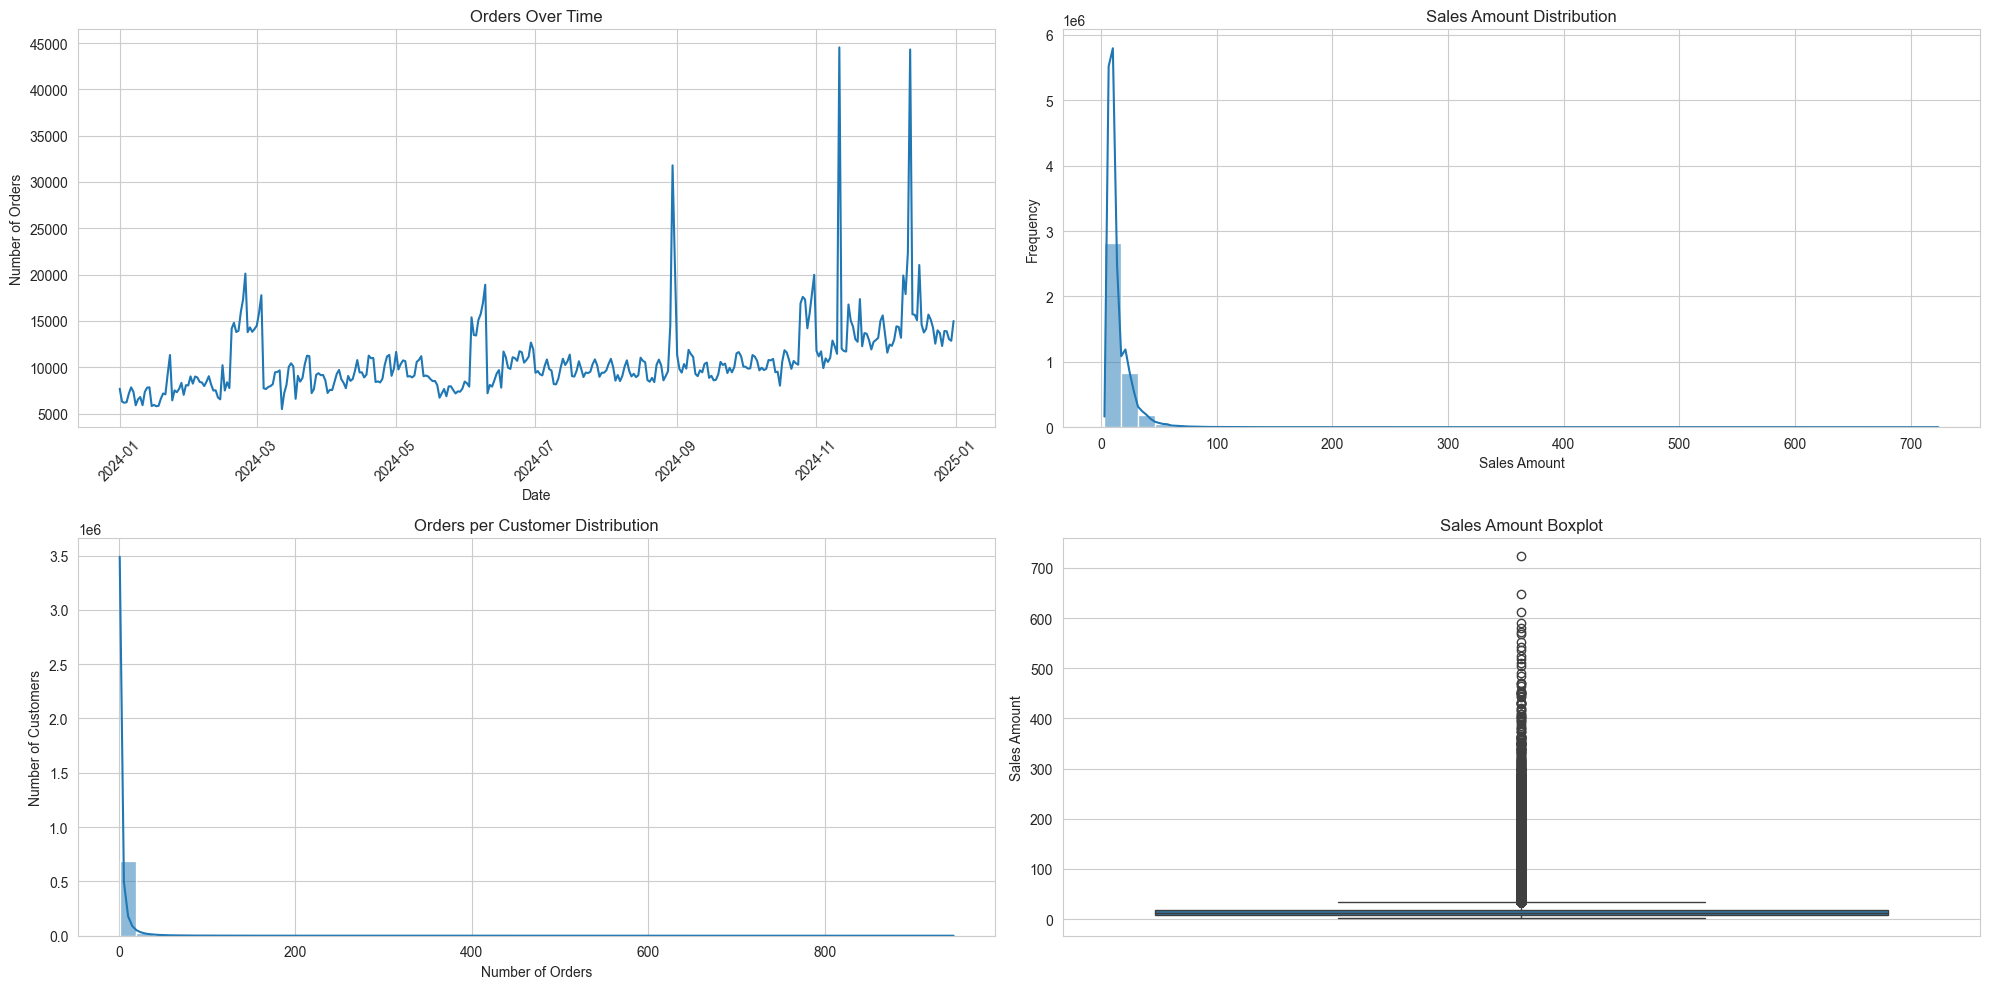

In [83]:
# # 2. Exploratory Data Analysis (EDA)
# Visualize order patterns, sales amount distribution, and customer order frequencies.

def perform_eda(df):
    plt.figure(figsize=(20, 10))
    
    # Order patterns over time
    plt.subplot(2, 2, 1)
    df['created_at'].dt.date.value_counts().sort_index().plot()
    plt.title('Orders Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=45)
    
    # Sales amount distribution
    plt.subplot(2, 2, 2)
    sns.histplot(df['sales_amount'], bins=50, kde=True)
    plt.title('Sales Amount Distribution')
    plt.xlabel('Sales Amount')
    plt.ylabel('Frequency')

    # Orders per customer
    plt.subplot(2, 2, 3)
    customer_orders = df['customer_id'].value_counts()
    sns.histplot(customer_orders, bins=50, kde=True)
    plt.title('Orders per Customer Distribution')
    plt.xlabel('Number of Orders')
    plt.ylabel('Number of Customers')
    
    # Boxplot of sales amount
    plt.subplot(2, 2, 4)
    sns.boxplot(y=df['sales_amount'])
    plt.title('Sales Amount Boxplot')
    plt.ylabel('Sales Amount')
    
    plt.tight_layout()
    plt.savefig('eda_plots.png')
    plt.show()

# Perform EDA
perform_eda(df)

In [130]:
# # 3. RFM Feature Engineering
# Transform order-level data into customer-level RFM features:
# - Recency: Days since last purchase
# - Frequency: Number of orders
# - Monetary: Total sales amount
def create_rfm_features(df):
    # Set reference date as today
    reference_date = df['created_at'].max() + pd.Timedelta(days=1)
    
    # Calculate RFM metrics
    rfm = df.groupby('customer_id').agg({
        'created_at': lambda x: ( reference_date - x.max()).days,  # Recency
        'id': 'count',  # Frequency
        'sales_amount': 'sum'  # Monetary
    })

    rfm.columns = ['recency', 'frequency', 'monetary']
    
    print("RFM Features Sample:")
    print(rfm.head())
    
    return rfm

# Create RFM features
rfm = create_rfm_features(df)

RFM Features Sample:
             recency  frequency       monetary
customer_id                                   
1000015           18          4 158.1100000000
100002            46         20 334.0300000000
1000020           68          6  52.1000000000
1000029            4         55 838.7900000000
1000035           16          8 125.1100000000


In [131]:
# Scale the log-transformed features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

/Users/max/Desktop/coding/recruitment_ML_test/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/max/Desktop/coding/recruitment_ML_test/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/max/Desktop/coding/recruitment_ML_test/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/max/Desktop/coding/recruitment_ML_test/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/max/Desktop/coding/recruitment_ML_test/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/max/Desktop/coding/recruitment_ML_test/venv/lib/p

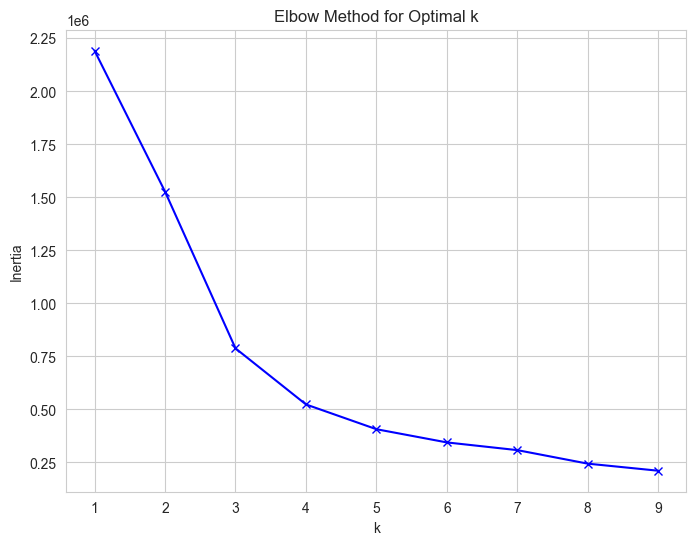

/Users/max/Desktop/coding/recruitment_ML_test/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/max/Desktop/coding/recruitment_ML_test/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/max/Desktop/coding/recruitment_ML_test/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/max/Desktop/coding/recruitment_ML_test/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/max/Desktop/coding/recruitment_ML_test/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/max/Desktop/coding/recruitment_ML_test/venv/lib/p

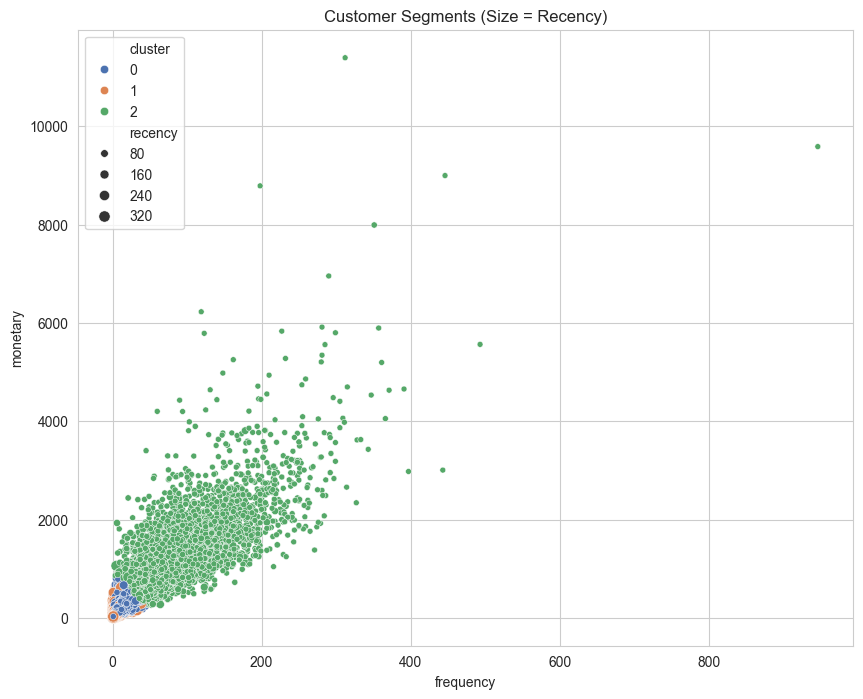

In [132]:
# # 5. Customer Segmentation
# Perform K-means clustering on scaled RFM features.

def perform_clustering(rfm, rfm_scaled):
    # Use scaled RFM features directly (already normalized)
    rfm_data = rfm_scaled

    # Elbow method to determine optimal number of clusters
    inertias = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(rfm_data)
        inertias.append(kmeans.inertia_)
    
    # Plot elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.savefig('elbow_plot.png')
    plt.show()
    
    # Choose number of clusters (4, adjustable based on elbow plot)
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    rfm['cluster'] = kmeans.fit_predict(rfm_data)
    
    # Visualize clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=rfm, x='frequency', y='monetary', 
                    size='recency', hue='cluster', palette='deep')
    plt.title('Customer Segments (Size = Recency)')
    plt.savefig('cluster_plot.png')
    plt.show()
    
    return rfm

# Perform clustering
rfm_clustered = perform_clustering(rfm, rfm_scaled)

In [133]:
# # 5. Cluster Analysis and Interpretation
# Analyze cluster characteristics, assign meaningful labels, and provide business recommendations.
def analyze_clusters(rfm):
    # Cluster summary statistics
    cluster_summary = rfm.groupby('cluster').agg({
        'recency': ['mean', 'min', 'max'],
        'frequency': ['mean', 'min', 'max'],
        'monetary': ['mean', 'min', 'max'],
        'cluster': 'count'
    }).round(2)
    
    print("\nCluster Summary:")
    print(cluster_summary)
    
    # Assign meaningful labels
    cluster_labels = {}
    for cluster in rfm['cluster'].unique():
        recency = cluster_summary['recency']['mean'][cluster]
        frequency = cluster_summary['frequency']['mean'][cluster]
        monetary = cluster_summary['monetary']['mean'][cluster]
        
        if recency < rfm['recency'].quantile(0.3) and frequency > rfm['frequency'].quantile(0.7):
            cluster_labels[cluster] = "Loyal High-Value"
        elif recency < rfm['recency'].quantile(0.3):
            cluster_labels[cluster] = "Recent Low-Value"
        elif recency > rfm['recency'].quantile(0.7):
            cluster_labels[cluster] = "Churn Risk"
        else:
            cluster_labels[cluster] = "Occasional Average"
    
    # Business recommendations
    recommendations = {
        "Loyal High-Value": "Implement VIP programs, exclusive offers, and personalized communications to maintain loyalty.",
        "Recent Low-Value": "Encourage repeat purchases through welcome discounts and product recommendations.",
        "Churn Risk": "Re-engage with reactivation campaigns, special offers, and surveys to understand their needs.",
        "Occasional Average": "Increase engagement through targeted promotions and loyalty program incentives."
    }
    
    print("\nCluster Labels and Recommendations:")
    for cluster, label in cluster_labels.items():
        print(f"Cluster {cluster}: {label}")
        print(f"Recommendation: {recommendations[label]}\n")
    
    return cluster_summary, cluster_labels, recommendations

# Analyze clusters
cluster_summary, cluster_labels, recommendations = analyze_clusters(rfm_clustered)


Cluster Summary:
               recency               frequency                monetary  \
                  mean  min  max          mean min  max           mean   
cluster                                                                  
0        49.8200000000    1  233  5.2200000000   1   45  81.9900000000   
1       251.7700000000  142  366  1.7800000000   1   41  29.9100000000   
2        13.4600000000    1  299 57.1300000000   4  946 828.5000000000   

                                        cluster  
                   min              max   count  
cluster                                          
0         3.1100000000   803.3000000000  451600  
1         3.1500000000   644.0000000000  259488  
2       257.5000000000 11394.8500000000   19397  

Cluster Labels and Recommendations:
Cluster 0: Occasional Average
Recommendation: Increase engagement through targeted promotions and loyalty program incentives.

Cluster 2: Loyal High-Value
Recommendation: Implement VIP programs, exclu